#Importing the Necessary Libraries

In [ ]:
!pip install Keras-Preprocessing
import numpy as np
import pandas as pd
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.corpus import reuters
from nltk.corpus import brown
from nltk.corpus import gutenberg
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import pickle
import joblib
from collections import Counter
from textblob import Word
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, GridSearchCV
from wordcloud import WordCloud,ImageColorGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Activation, Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Flatten, GRU, Conv1D, MaxPooling1D, Bidirectional
!pip install ktrain
import ktrain
from ktrain import text
sns.set()
%matplotlib inline
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('gutenberg')
nltk.download('brown')
nltk.download("reuters")
nltk.download('words')
nltk.download('punkt')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 52.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 58.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 23.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 34.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#Loading the Dataset

In [ ]:
df = pd.read_csv('/content/kaggle_movie_train.csv')

In [ ]:
df.head(5)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


#Exploratory Data Analysis(EDA)

In [ ]:
df.shape

(22579, 3)

In [ ]:
df.describe().T

,count,unique,top,freq
text,22579,22579,"eady dead, maybe even wishing he was. INT. 2ND...",1
genre,22579,9,drama,8873


In [ ]:
df['genre'].value_counts()

drama        8873
thriller     6824
comedy       2941
action       2392
sci-fi        613
horror        456
other         270
adventure     147
romance        63
Name: genre, dtype: int64

In [ ]:
df.isna().sum()

id       0
text     0
genre    0
dtype: int64

In [ ]:
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

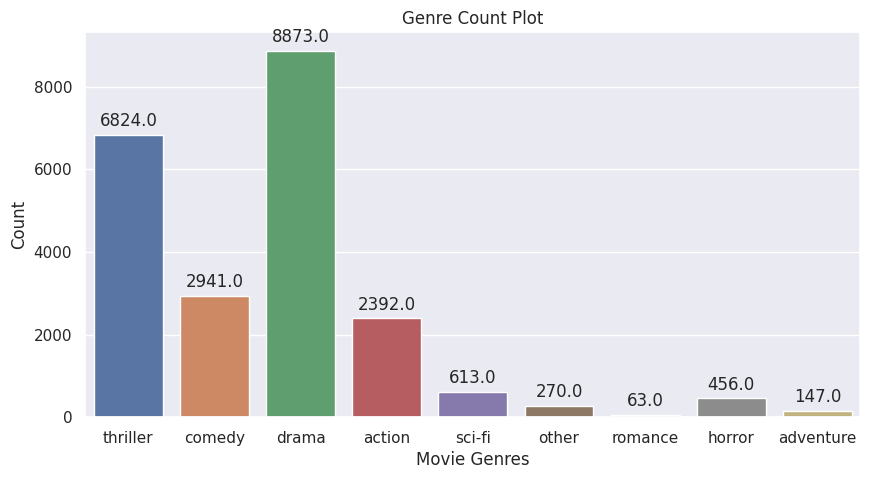

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='genre', data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Count Plot')
plt.show()

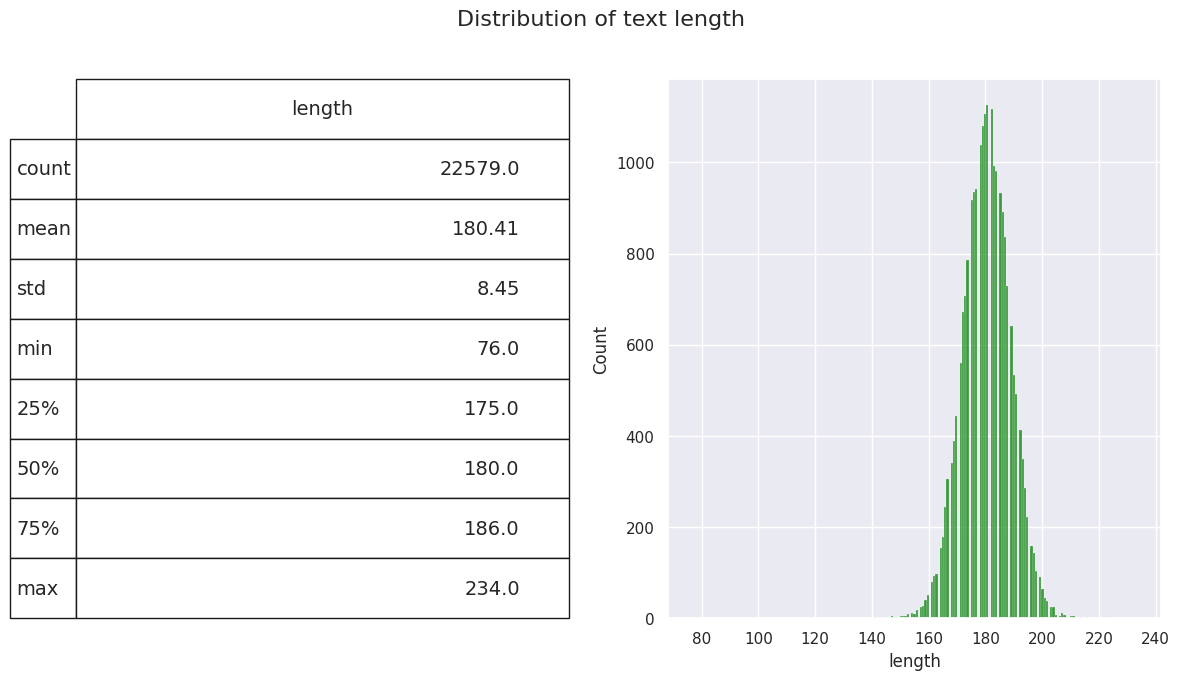

In [ ]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df['length'], ax=ax1,color='green')
describe = df.length.describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length', fontsize=16)

plt.show()

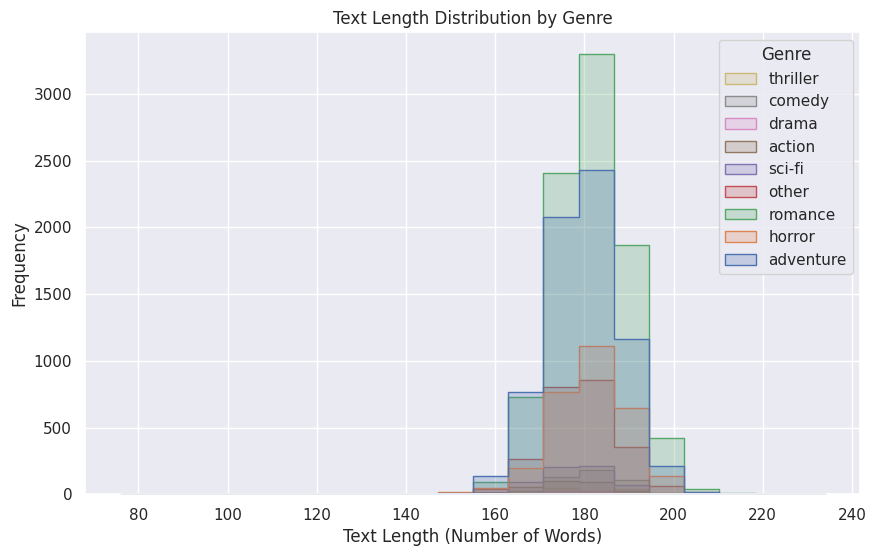

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='length', hue='genre', bins=20, element='step')
plt.title("Text Length Distribution by Genre")
plt.xlabel("Text Length (Number of Words)")
plt.ylabel("Frequency")

unique_genre = df['genre'].unique()
plt.legend(title="Genre", labels=unique_genre)

plt.show()

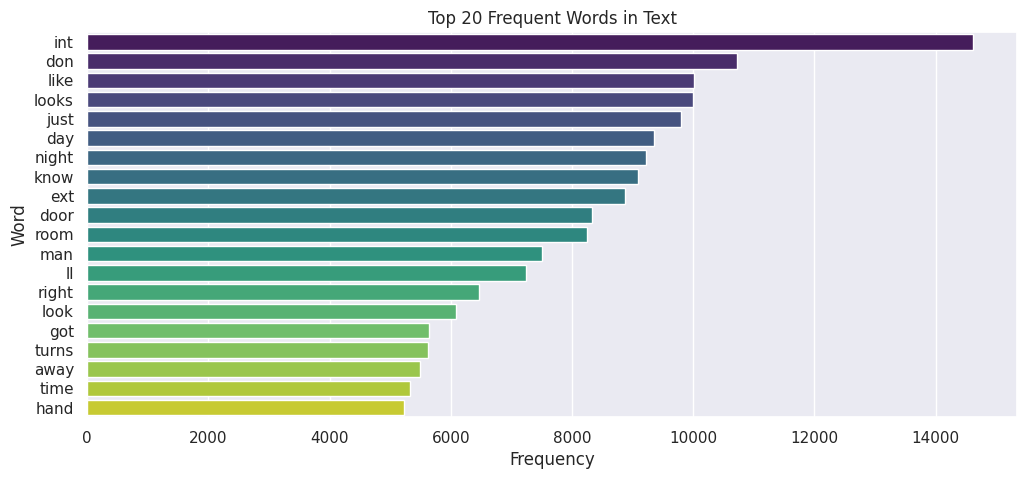

In [ ]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])

word_freq = pd.DataFrame(X.sum(axis=0), columns=vectorizer.get_feature_names_out())
top_words = word_freq.transpose().sort_values(0, ascending=False).head(20)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_words[0], y=top_words.index, palette="viridis")
plt.title('Top 20 Frequent Words in Text')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

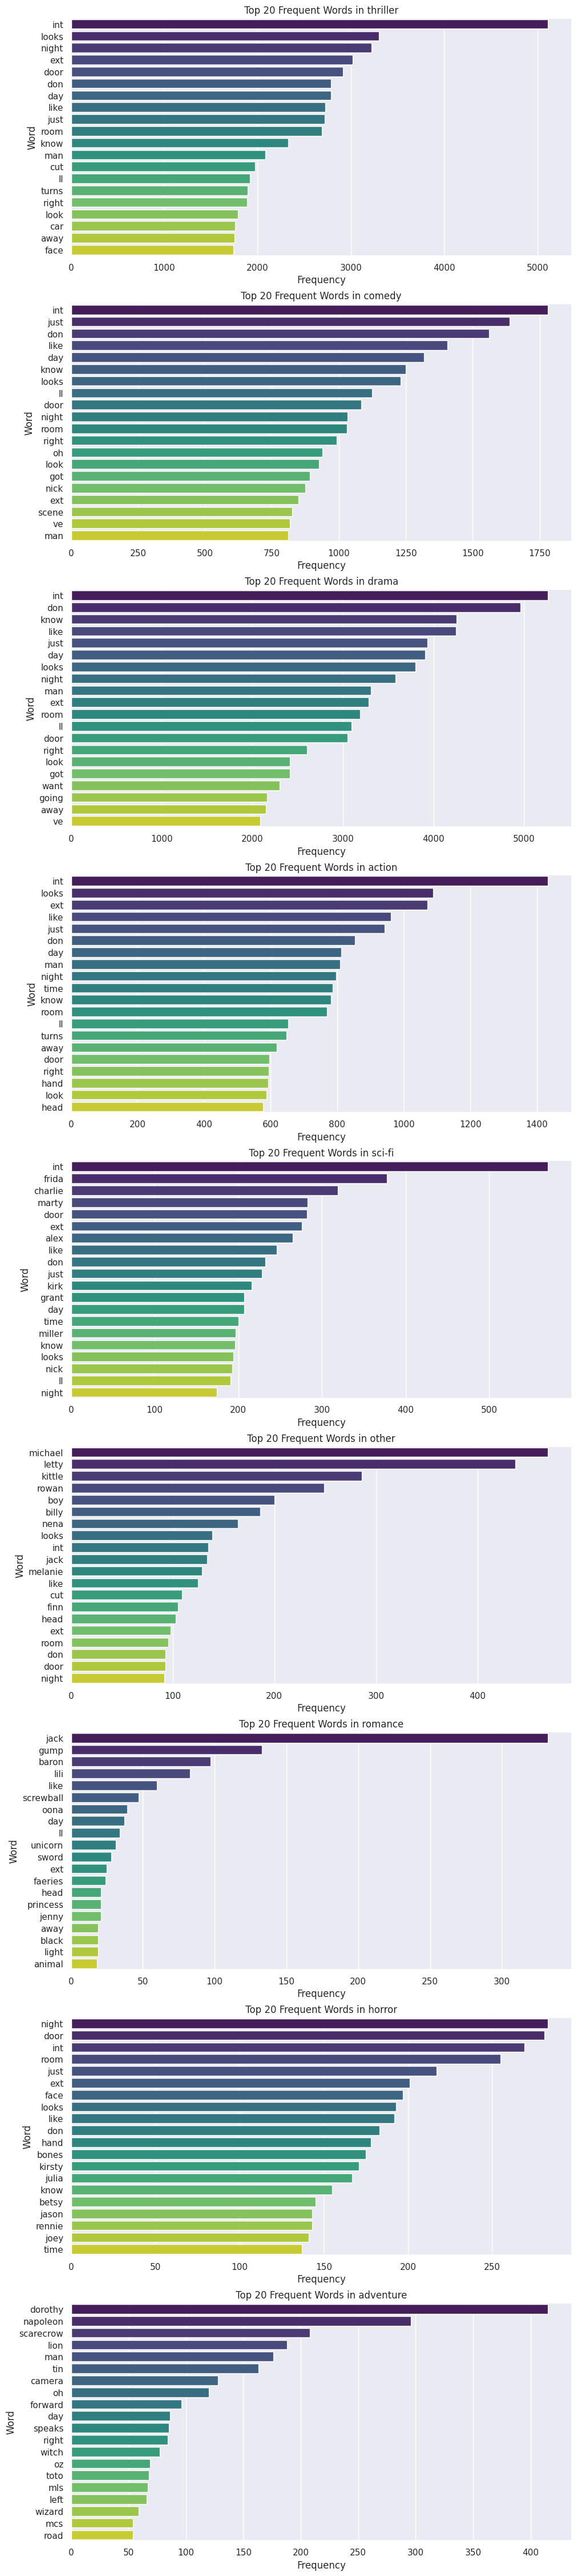

In [ ]:
fig, axes = plt.subplots(nrows=len(df['genre'].unique()), ncols=1, figsize=(10, 45), constrained_layout=True)

for ax, genre in zip(axes, df['genre'].unique()):
    subset_df = df[df['genre'] == genre]

    X = vectorizer.fit_transform(subset_df['text'])
    word_freq = pd.DataFrame(X.sum(axis=0), columns=vectorizer.get_feature_names_out())
    top_words = word_freq.transpose().sort_values(0, ascending=False).head(20)

    sns.barplot(x=top_words[0], y=top_words.index, palette="viridis", ax=ax)
    ax.set_title(f'Top 20 Frequent Words in {genre}')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Word')

plt.show()

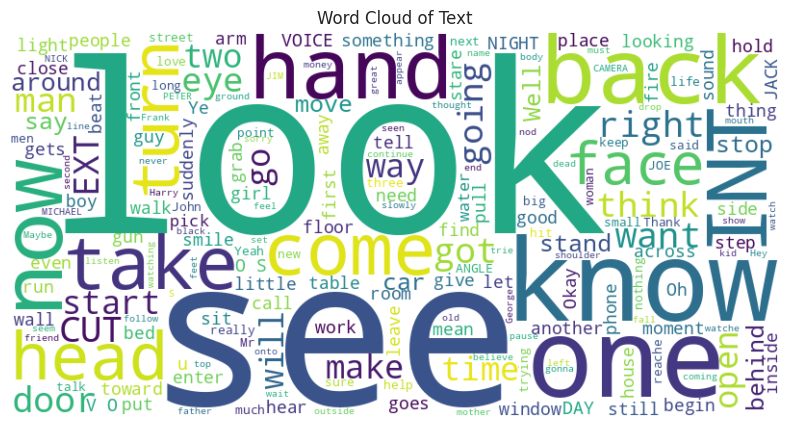

In [ ]:
text = ' '.join(df['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(f'Word Cloud of Text')
plt.axis('off')
plt.show()

In [ ]:
for genre in df['genre'].unique():
    subset_df = df[df['genre'] == genre]
    genre_text = ' '.join(subset_df['text'])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genre_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {genre.capitalize()} Genre')
    plt.axis('off')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

##Text Cleaning and Preprocessing

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    return ' '.join(lemmatized_tokens)

df['processed_text'] = df['text'].apply(preprocess_text)

In [ ]:
df.processed_text.apply(lambda x: len(x.split(" "))).mean()

105.76079542938129

#Machine Learning Models

##Vectorization and Splitting

In [ ]:
vectorizer = CountVectorizer(max_features=50000)
X = vectorizer.fit_transform(df['processed_text'])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['genre'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18063, 50000) (4516, 50000) (18063,) (4516,)


##Logistic Regression Hyperparameter Tuning and Evaluation

In [ ]:
lr = LogisticRegression()

param_grid = {
    'C': [0.1, 1, 10],
    'max_iter': [300, 500, 1000],
}

grid_search = GridSearchCV(lr, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'max_iter': [300, 500, 1000]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_lr_model = grid_search.best_estimator_
y_pred = best_lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'C': 10, 'max_iter': 300}
Accuracy : 92.40%
Classification Report:
              precision    recall  f1-score   support

      action       0.93      0.91      0.92       473
   adventure       0.96      0.88      0.92        25
      comedy       0.94      0.90      0.92       635
       drama       0.91      0.95      0.93      1728
      horror       0.92      0.79      0.85        84
       other       0.97      0.91      0.94        66
     romance       1.00      0.83      0.91        12
      sci-fi       0.94      0.78      0.86       106
    thriller       0.93      0.93      0.93      1387

    accuracy                           0.92      4516
   macro avg       0.94      0.88      0.91      4516
weighted avg       0.92      0.92      0.92      4516



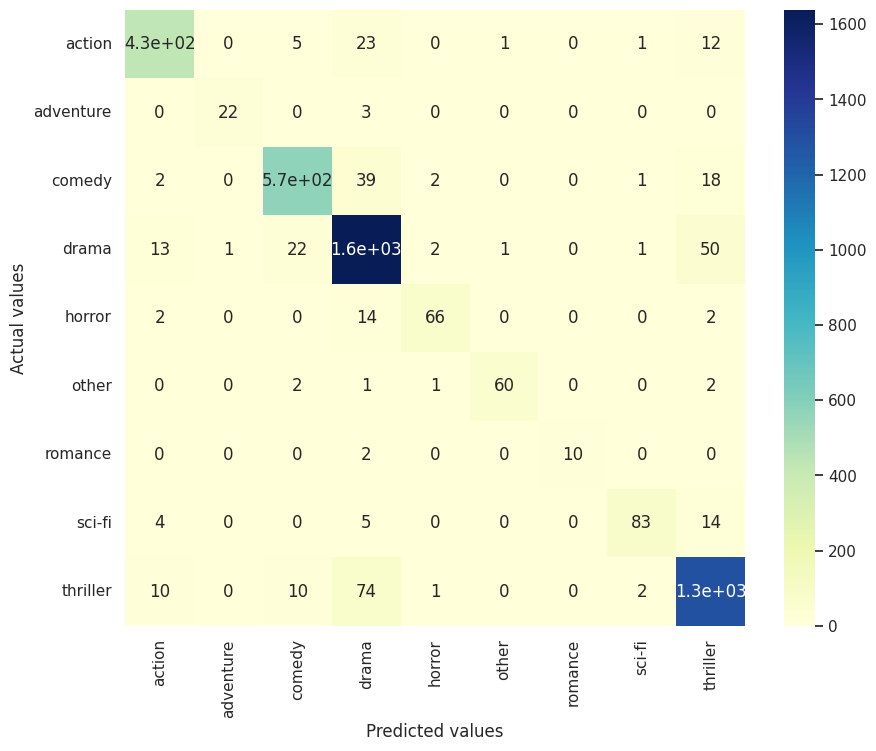

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [ ]:
text = vectorizer.transform(["dead bodies. GEORDI Mitchell... DePaul... LANGE This one's a woman... named Kirby. Picard and Beverly move toward the immense blast door. As Beverly scans it, Picard glances at a nearby desk... 57 THE DESK 57 is littered with debris and various documents and schematics. THREE PHOTOGRAPHS are pinned to a bulletin board above the desk they show Zephram Cochrane and two angles of his warp ship. The photos are odd looking, printed on what appears to be some sort of cloth. BEVERLY There's a life sign behind this door... about ten meters below. Geordi moves to the door. GEORDI Blast door. It's designed to protect the control room when the missile is launched. PICARD There should be some kind of manual release... They hunt around for a moment. Geordi runs his hand along the edge of the blast door. Picard turns to the Guards. PICARD to Lange Get those fires out and then try to restore main power to the control room. LANGE Aye, sir. The Guards move off. GEORDI Got it, Captain. Geordi has found"])
pred = best_lr_model.predict(text)
predicted_labels = label_encoder.inverse_transform(pred)
print(predicted_labels)

['thriller']


##LinearSVC Hyperparameter Tuning and Evaluation

In [ ]:
svc_model = LinearSVC()

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'class_weight': ['balanced'],
    'loss': ['squared_hinge'],
    'max_iter': [500, 1000, 1500,],
}

grid_search = GridSearchCV(svc_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'class_weight': ['balanced'],
                         'loss': ['squared_hinge'],
                         'max_iter': [500, 1000, 1500]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
best_svc_model = grid_search.best_estimator_

y_pred2 = best_svc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
classification_rep = classification_report(y_test, y_pred2, target_names=label_encoder.classes_)

print("Best Hyperparameters:", best_params)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Best Hyperparameters: {'C': 0.01, 'class_weight': 'balanced', 'loss': 'squared_hinge', 'max_iter': 500}
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

      action       0.93      0.94      0.93       473
   adventure       0.96      0.92      0.94        25
      comedy       0.92      0.93      0.93       635
       drama       0.93      0.93      0.93      1728
      horror       0.87      0.88      0.88        84
       other       0.98      0.97      0.98        66
     romance       1.00      1.00      1.00        12
      sci-fi       0.88      0.86      0.87       106
    thriller       0.94      0.94      0.94      1387

    accuracy                           0.93      4516
   macro avg       0.93      0.93      0.93      4516
weighted avg       0.93      0.93      0.93      4516



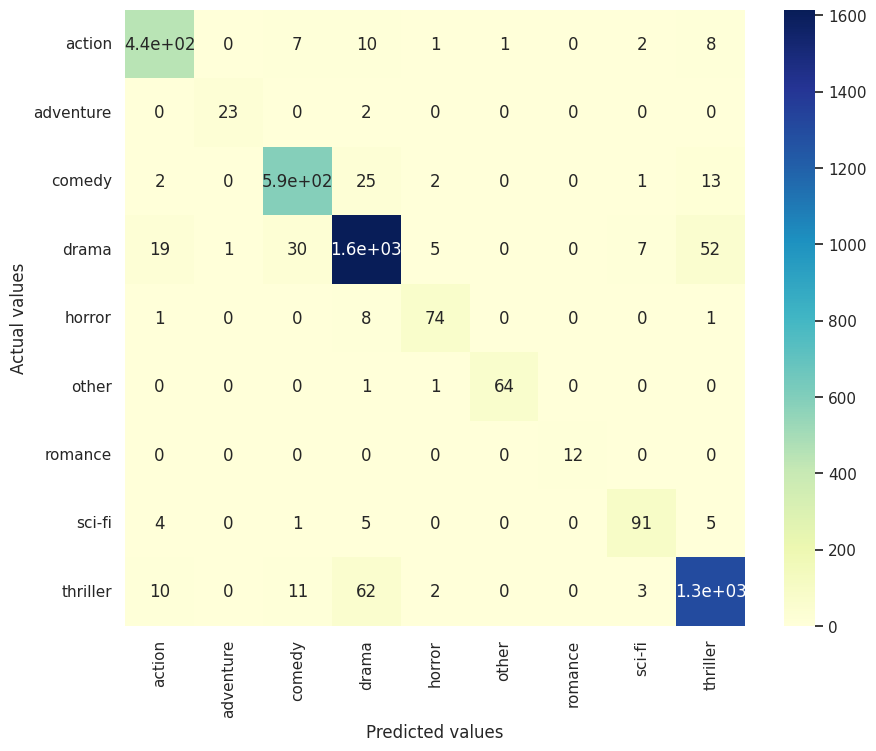

In [ ]:
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize = (10,8))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [ ]:
text = vectorizer.transform(["dead bodies. GEORDI Mitchell... DePaul... LANGE This one's a woman... named Kirby. Picard and Beverly move toward the immense blast door. As Beverly scans it, Picard glances at a nearby desk... 57 THE DESK 57 is littered with debris and various documents and schematics. THREE PHOTOGRAPHS are pinned to a bulletin board above the desk they show Zephram Cochrane and two angles of his warp ship. The photos are odd looking, printed on what appears to be some sort of cloth. BEVERLY There's a life sign behind this door... about ten meters below. Geordi moves to the door. GEORDI Blast door. It's designed to protect the control room when the missile is launched. PICARD There should be some kind of manual release... They hunt around for a moment. Geordi runs his hand along the edge of the blast door. Picard turns to the Guards. PICARD to Lange Get those fires out and then try to restore main power to the control room. LANGE Aye, sir. The Guards move off. GEORDI Got it, Captain. Geordi has found"])
pred = best_svc_model.predict(text)
predicted_labels = label_encoder.inverse_transform(pred)
print(predicted_labels)

['thriller']


##Multinomial NaiveBayes Hyperparameter Tuning and Evaluation

In [ ]:
mnb= MultinomialNB()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
}

grid_search = GridSearchCV(mnb, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
best_mnb_model = grid_search.best_estimator_

y_pred3 = best_mnb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
classification_rep = classification_report(y_test, y_pred3, target_names=label_encoder.classes_)

print("Best Hyperparameters:", best_params)
print(f"Accuracy: {accuracy:.2f}%")
print("\nClassification Report:")
print(classification_rep)

Best Hyperparameters: {'alpha': 0.1}
Accuracy: 0.93%

Classification Report:
              precision    recall  f1-score   support

      action       0.94      0.96      0.95       473
   adventure       0.92      0.96      0.94        25
      comedy       0.93      0.94      0.93       635
       drama       0.94      0.93      0.93      1728
      horror       0.88      0.96      0.92        84
       other       0.98      0.94      0.96        66
     romance       0.86      1.00      0.92        12
      sci-fi       0.85      0.93      0.89       106
    thriller       0.93      0.93      0.93      1387

    accuracy                           0.93      4516
   macro avg       0.91      0.95      0.93      4516
weighted avg       0.93      0.93      0.93      4516



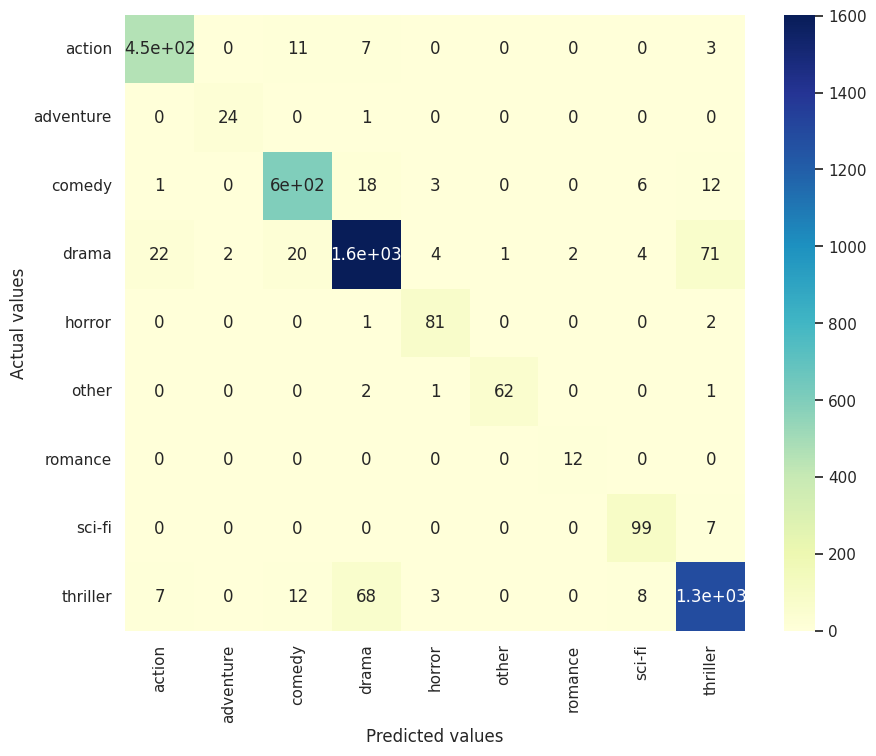

In [ ]:
cm = confusion_matrix(y_test, y_pred3)
plt.figure(figsize = (10,8))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [ ]:
text = vectorizer.transform(["dead bodies. GEORDI Mitchell... DePaul... LANGE This one's a woman... named Kirby. Picard and Beverly move toward the immense blast door. As Beverly scans it, Picard glances at a nearby desk... 57 THE DESK 57 is littered with debris and various documents and schematics. THREE PHOTOGRAPHS are pinned to a bulletin board above the desk they show Zephram Cochrane and two angles of his warp ship. The photos are odd looking, printed on what appears to be some sort of cloth. BEVERLY There's a life sign behind this door... about ten meters below. Geordi moves to the door. GEORDI Blast door. It's designed to protect the control room when the missile is launched. PICARD There should be some kind of manual release... They hunt around for a moment. Geordi runs his hand along the edge of the blast door. Picard turns to the Guards. PICARD to Lange Get those fires out and then try to restore main power to the control room. LANGE Aye, sir. The Guards move off. GEORDI Got it, Captain. Geordi has found"])
pred = best_mnb_model.predict(text)
predicted_labels = label_encoder.inverse_transform(pred)
print(predicted_labels)

['thriller']


##GradientBoostingClassifier Training and Evaluation

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=300, max_features='auto', max_depth=5, random_state=1, verbose=1)

gbc.fit(X_train, y_train)
y_pred4 = gbc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred4) * 100
classification_rep = classification_report(y_test, y_pred4, target_names=label_encoder.classes_)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

      Iter       Train Loss   Remaining Time 
         1           1.3509           61.52m
         2           1.2937           48.21m
         3           1.2562           47.40m
         4           1.2241           44.08m
         5           1.2002           44.40m
         6           1.1792           48.70m
         7           1.1550           56.35m
         8           1.1368           61.99m
         9           1.1189           64.36m
        10           1.1043           65.49m
        20           0.9854           58.85m
        30           0.9049           50.14m
        40           0.8362           45.11m
        50           0.7854           41.54m
        60           0.7375           38.58m
        70           0.6989           36.19m
        80           0.6651           33.87m
        90           0.6339           31.85m
       100           0.6057           30.02m
       200           0.4231           14.12m
       300           0.3221            0.00s
Accuracy 

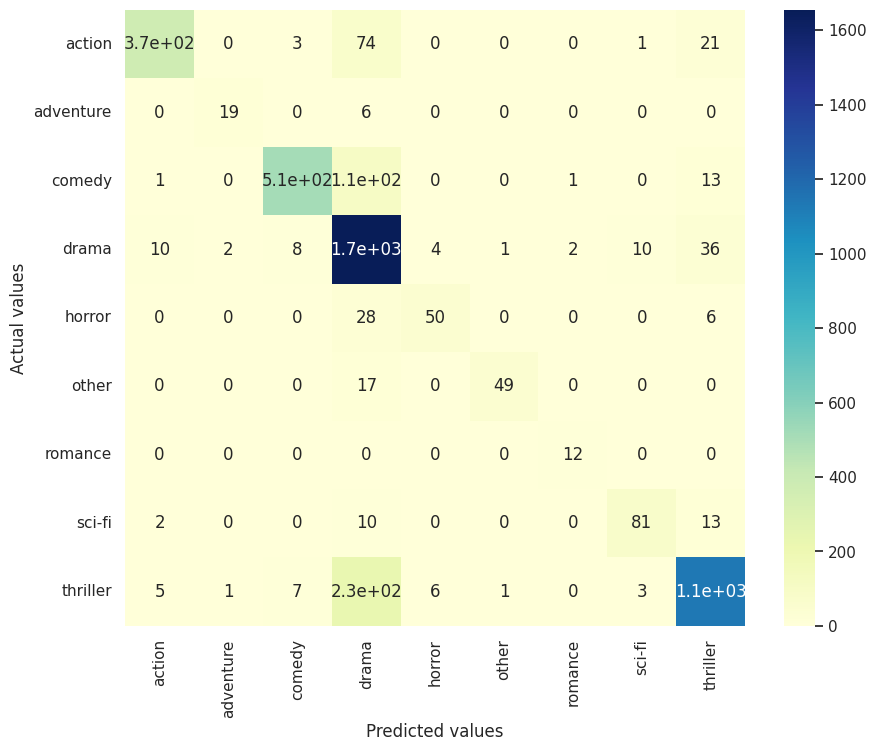

In [ ]:
cm = confusion_matrix(y_test, y_pred4)
plt.figure(figsize = (10,8))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [ ]:
text = vectorizer.transform(["dead bodies. GEORDI Mitchell... DePaul... LANGE This one's a woman... named Kirby. Picard and Beverly move toward the immense blast door. As Beverly scans it, Picard glances at a nearby desk... 57 THE DESK 57 is littered with debris and various documents and schematics. THREE PHOTOGRAPHS are pinned to a bulletin board above the desk they show Zephram Cochrane and two angles of his warp ship. The photos are odd looking, printed on what appears to be some sort of cloth. BEVERLY There's a life sign behind this door... about ten meters below. Geordi moves to the door. GEORDI Blast door. It's designed to protect the control room when the missile is launched. PICARD There should be some kind of manual release... They hunt around for a moment. Geordi runs his hand along the edge of the blast door. Picard turns to the Guards. PICARD to Lange Get those fires out and then try to restore main power to the control room. LANGE Aye, sir. The Guards move off. GEORDI Got it, Captain. Geordi has found"])
pred = gbc.predict(text)
predicted_labels = label_encoder.inverse_transform(pred)
print(predicted_labels)

['thriller']


##VotingClassifier Training and Evaluation

In [ ]:
mnb = MultinomialNB(alpha= 0.1)
lr = LogisticRegression(C = 10, max_iter = 1000, n_jobs=-1)
svc = SVC(probability=True)

ec=VotingClassifier(estimators=[('Multinominal NB', mnb), ('Logistic Regression',lr),('Support Vector Machine',svc)], voting='soft', weights=[1,2,3])
ec.fit(X_train,y_train)

y_pred5 = ec.predict(X_test)

accuracy = accuracy_score(y_test, y_pred5) * 100
classification_rep = classification_report(y_test, y_pred5)

print(f"Accuracy : {accuracy:.2f}%")
print("Classification Report:")
print(classification_rep)

Accuracy : 94.26%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       473
           1       0.96      0.92      0.94        25
           2       0.95      0.93      0.94       635
           3       0.93      0.95      0.94      1728
           4       0.91      0.89      0.90        84
           5       0.98      0.97      0.98        66
           6       1.00      0.92      0.96        12
           7       0.92      0.88      0.90       106
           8       0.95      0.94      0.95      1387

    accuracy                           0.94      4516
   macro avg       0.95      0.93      0.94      4516
weighted avg       0.94      0.94      0.94      4516



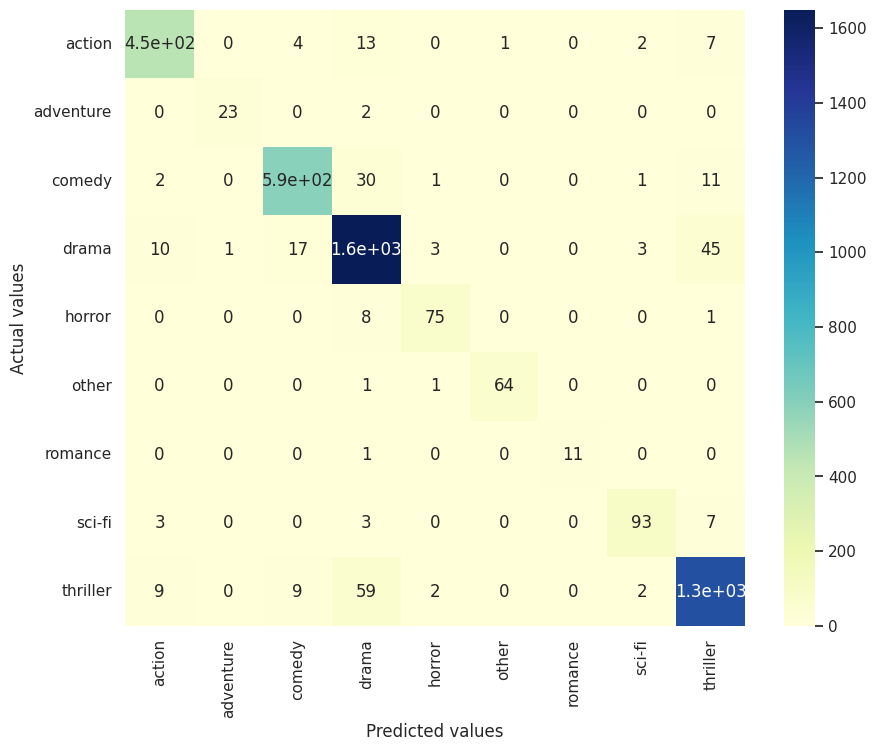

In [ ]:
cm = confusion_matrix(y_test, y_pred5)
plt.figure(figsize = (10,8))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [ ]:
text = vectorizer.transform(["dead bodies. GEORDI Mitchell... DePaul... LANGE This one's a woman... named Kirby. Picard and Beverly move toward the immense blast door. As Beverly scans it, Picard glances at a nearby desk... 57 THE DESK 57 is littered with debris and various documents and schematics. THREE PHOTOGRAPHS are pinned to a bulletin board above the desk they show Zephram Cochrane and two angles of his warp ship. The photos are odd looking, printed on what appears to be some sort of cloth. BEVERLY There's a life sign behind this door... about ten meters below. Geordi moves to the door. GEORDI Blast door. It's designed to protect the control room when the missile is launched. PICARD There should be some kind of manual release... They hunt around for a moment. Geordi runs his hand along the edge of the blast door. Picard turns to the Guards. PICARD to Lange Get those fires out and then try to restore main power to the control room. LANGE Aye, sir. The Guards move off. GEORDI Got it, Captain. Geordi has found"])
pred = ec.predict(text)
predicted_labels = label_encoder.inverse_transform(pred)
print(predicted_labels)

['thriller']


#Deep Learning Models

##Text Preprocessing and Genre Label Encoding for Deep Learning

In [ ]:
label_encoder = LabelEncoder()
df['genre'] = label_encoder.fit_transform(df['genre'])

In [ ]:
X = df['text']
y = df['genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

72541


In [ ]:
max_length = 220
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

##Training and Evaluating LSTM for Movie Genre Prediction

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
model_lstm.add(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))
model_lstm.add(LSTM(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))
model_lstm.add(Dropout(0.3))
model_lstm.add(Flatten())
model_lstm.add(Dense(128, activation='relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(len(label_encoder.classes_), activation='softmax'))

model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 220, 128)          9285248   
                                                                 
 lstm (LSTM)                 (None, 220, 128)          131584    
                                                                 
 lstm_1 (LSTM)               (None, 220, 64)           49408     
                                                                 
 dropout (Dropout)           (None, 220, 64)           0         
                                                                 
 flatten (Flatten)           (None, 14080)             0         
                                                                 
 dense (Dense)               (None, 128)               1802368   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath="lastm-1-layer-best_model.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)
early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history_lstm = model_lstm.fit(X_train, y_train, epochs = 5, batch_size = 128, validation_data=(X_test,y_test), callbacks=callbacks)

Epoch 1/5
142/142 [==============================] - 463s 3s/step - loss: 1.1070 - accuracy: 0.5670 - val_loss: 0.5098 - val_accuracy: 0.8361 - lr: 0.0010
Epoch 2/5
142/142 [==============================] - 453s 3s/step - loss: 0.2711 - accuracy: 0.9076 - val_loss: 0.3473 - val_accuracy: 0.8922 - lr: 0.0010
Epoch 3/5
142/142 [==============================] - 443s 3s/step - loss: 0.0708 - accuracy: 0.9773 - val_loss: 0.3448 - val_accuracy: 0.8981 - lr: 0.0010
Epoch 4/5
142/142 [==============================] - 443s 3s/step - loss: 0.0311 - accuracy: 0.9903 - val_loss: 0.4473 - val_accuracy: 0.8948 - lr: 0.0010
Epoch 5/5
142/142 [==============================] - 440s 3s/step - loss: 0.0333 - accuracy: 0.9903 - val_loss: 0.4112 - val_accuracy: 0.9023 - lr: 0.0010


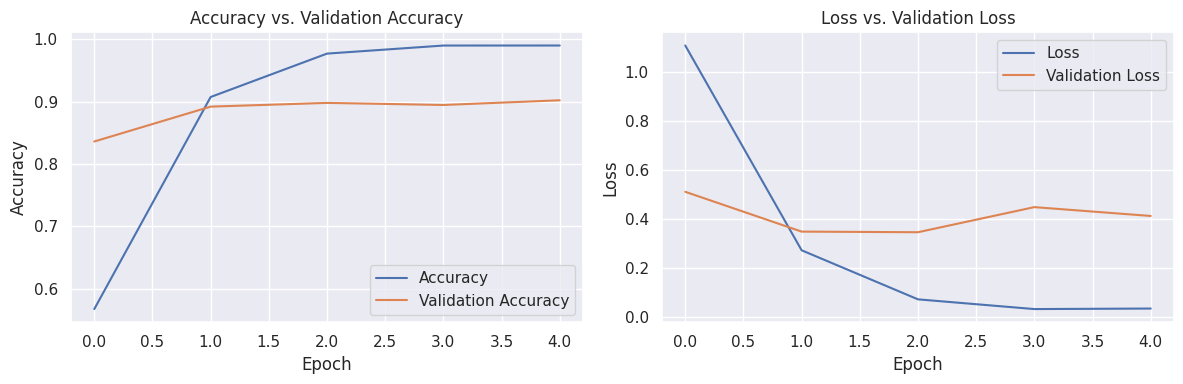

In [ ]:
accuracy = history_lstm.history['accuracy']
val_accuracy = history_lstm.history['val_accuracy']
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Validation Loss')

plt.tight_layout()
plt.show()

In [ ]:
hist_=pd.DataFrame(history_lstm.history)
hist_

,loss,accuracy,val_loss,val_accuracy,lr
0,1.107004,0.567015,0.509821,0.836138,0.001
1,0.271098,0.907601,0.347306,0.892161,0.001
2,0.070786,0.977302,0.344810,0.898140,0.001
3,0.031112,0.990256,0.447263,0.894818,0.001
4,0.033289,0.990312,0.411192,0.902347,0.001


In [ ]:
loss, accuracy = model_lstm.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

142/142 [==============================] - 22s 151ms/step - loss: 0.4112 - accuracy: 0.9023
Test Loss: 0.4112
Test Accuracy: 90.23%


In [ ]:
class_names = label_encoder.classes_

y_test_original = np.argmax(y_test, axis=1)
y_pred = np.argmax(model_lstm.predict(X_test), axis=1)

report = classification_report(y_test_original, y_pred, target_names=class_names)
print('Classification Report:\n', report)

142/142 [==============================] - 25s 172ms/step
Classification Report:
               precision    recall  f1-score   support

      action       0.91      0.89      0.90       473
   adventure       0.95      0.72      0.82        25
      comedy       0.92      0.89      0.91       635
       drama       0.91      0.94      0.92      1728
      horror       0.65      0.77      0.71        84
       other       0.98      0.76      0.85        66
     romance       0.17      0.08      0.11        12
      sci-fi       0.64      0.76      0.70       106
    thriller       0.93      0.90      0.92      1387

    accuracy                           0.90      4516
   macro avg       0.78      0.75      0.76      4516
weighted avg       0.90      0.90      0.90      4516



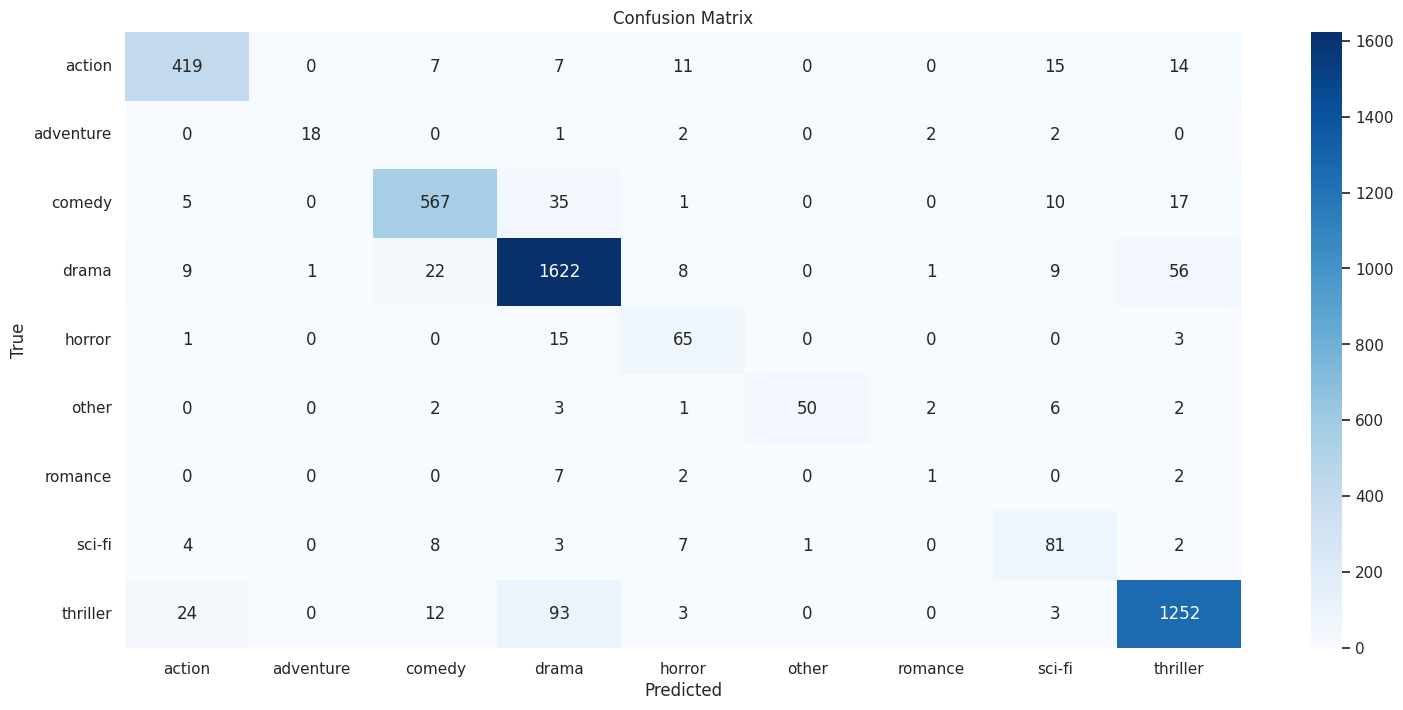

In [ ]:
conf_matrix = confusion_matrix(y_test_original, y_pred)

plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def predict_genres(scripts, model, tokenizer, max_length, label_encoder):
    predictions = []

    for script in scripts:
        sequences = tokenizer.texts_to_sequences([script])
        padded_sequences = pad_sequences(sequences, maxlen=max_length)

        probabilities = model.predict(padded_sequences)[0]
        predicted_genre = label_encoder.inverse_transform([probabilities.argmax()])[0]
        predictions.append((predicted_genre, probabilities.max()))

    return predictions

scripts = [
    "dead bodies. GEORDI Mitchell... DePaul... LANGE This one's a woman... named Kirby. Picard and Beverly move toward the immense blast door. As Beverly scans it, Picard glances at a nearby desk... 57 THE DESK 57 is littered with debris and various documents and schematics. THREE PHOTOGRAPHS are pinned to a bulletin board above the desk they show Zephram Cochrane and two angles of his warp ship. The photos are odd looking, printed on what appears to be some sort of cloth. BEVERLY There's a life sign behind this door... about ten meters below. Geordi moves to the door. GEORDI Blast door. It's designed to protect the control room when the missile is launched. PICARD There should be some kind of manual release... They hunt around for a moment. Geordi runs his hand along the edge of the blast door. Picard turns to the Guards. PICARD to Lange Get those fires out and then try to restore main power to the control room. LANGE Aye, sir. The Guards move off. GEORDI Got it, Captain. Geordi has found",
    "slowly. At the entrance to the alley stands a vampire. They stare at each other, some thirty feet away. BUFFY continuing Hello... She moves back a step. The vampire takes a step. BUFFY continuing What do you want? It floats rapidly at her, hissing. Buffy looks about her frantically, trapped. It hits her at top speed and she instantly rolls onto her back, flipping it and hurling it against the wall at the end of the alley. As it hits, Buffy, still rolling, produces a stake from her jacket and throws it directly at its heart. The stake punctures the startled creature's chest. Before he can so much as grab it, Buffy throws a roundhouse kick, driving the stake all the way home with her foot. The vampire screams, sinks to the ground. Buffy turns, triumphant. BUFFY continuing Toaster caked him! CLOSEUP A STOPWATCH A hand stops it. It is Merrick, who steps into the alley and stares at Buffy. CUT TO EXT. OUTSIDE THE WAREHOUSE NIGHT The two exit Merrick's car, an old Dodge Dart. As they talk, t",
    "edge of the field. Neil steps closer. THE TOMBSTONE The inscription reads Here Lies Amanda Krueger Her name in Christ, Sister Mary Helena. Born 1907 Died 1968 CLOSEUP NEIL NEIL softly My God. You were his mother. DISSOLVE TO EXT. NEIL'S HOUSE NIGHT The seasons have changed. A blanket of freshly fallen snow covers the house. A VW Rabbit with New York plates is parked in the driveway. INT. NEIL'S HOUSE Kristen and Neil have finished a meal together and are sipping wine. Her hair is shorter. Neil looks thinner, a little weary. NEIL I'm glad things have worked out for you. KRISTEN I think new York was just what I needed. So many people. I never feel alone. NEIL smiles The city that never sleeps. pause So what will you do now? KRISTEN I don't know. I'm busy with school. New friends. beat But I'll never forget the old ones. NEIL raises his glass To old friends. And your new dreams. KRISTEN To old friends. CUT TO EXT. NEIL'S HOUSE NIGHT Neil is at the door, seeing Kristen off. NEIL It was gre",
    "glances at her. BOOK Maybe I ought to learn to drive this thing. Rachel says nothing. BOOK beat Pick myself up another useful skill. Now Rachel can't help but smile. She looks at him. And... EXT. ANGLE We can see the Lapp buggy approaching a rural intersection, another buggy approaching at right angles. INT. LAPP BUGGY As Rachel eyes the other buggy through the windshield. RACHEL Samuel, who is that? Samuel checks out the buggy. SAMUEL It looks like Hochstetler's mare. EXT. ANGLE As the Lapp buggy passes the intersection and the Hochstetler buggy swings in behind them. Then the Hochstetler buggy, coming on at a faster clip, starts to pass the Lapp buggy. INT. LAPP BUGGY As Rachel waves at the occupants of the other buggy Daniel returns her greeting BOOK teasing her Uh oh, they're leaving us behind. Rachel gives him a look, and... gives the reins a flick the race is on. RACE MONTAGE Hochstetler has a couple of older folk on board, together with his young sister at first they're not awa"
]

predicted_genres = predict_genres( scripts, model_lstm, tokenizer, max_length, label_encoder)

for text, (predicted_genre, probability) in zip(scripts, predicted_genres):
    print(f"Script Portion: '{text}'")
    print(f"Predicted Genre: {predicted_genre}")
    print(f"Probability of {predicted_genre}: {probability:.4f}\n")


1/1 [==============================] - 0s 147ms/step
Script Portion: 'dead bodies. GEORDI Mitchell... DePaul... LANGE This one's a woman... named Kirby. Picard and Beverly move toward the immense blast door. As Beverly scans it, Picard glances at a nearby desk... 57 THE DESK 57 is littered with debris and various documents and schematics. THREE PHOTOGRAPHS are pinned to a bulletin board above the desk they show Zephram Cochrane and two angles of his warp ship. The photos are odd looking, printed on what appears to be some sort of cloth. BEVERLY There's a life sign behind this door... about ten meters below. Geordi moves to the door. GEORDI Blast door. It's designed to protect the control room when the missile is launched. PICARD There should be some kind of manual release... They hunt around for a moment. Geordi runs his hand along the edge of the blast door. Picard turns to the Guards. PICARD to Lange Get those fires out and then try to restore main power to the control room. LANGE Ay

##Training and Evaluating GRU for Movie Genre Prediction

In [ ]:
model_gru = Sequential()
model_gru.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
model_gru.add(GRU(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))
model_gru.add(GRU(64, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))
model_gru.add(Dropout(0.3))
model_gru.add(Flatten())
model_gru.add(Dense(128, activation='relu'))
model_gru.add(Dropout(0.3))
model_gru.add(Dense(len(label_encoder.classes_), activation='softmax'))

model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 220, 128)          9285248   
                                                                 
 gru (GRU)                   (None, 220, 128)          99072     
                                                                 
 gru_1 (GRU)                 (None, 220, 64)           37248     
                                                                 
 dropout_2 (Dropout)         (None, 220, 64)           0         
                                                                 
 flatten_1 (Flatten)         (None, 14080)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1802368   
                                                                 
 dropout_3 (Dropout)         (None, 128)              

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath="GRU_best_model.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)
early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks2=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history_gru = model_gru.fit(X_train, y_train, epochs=5, batch_size=128,validation_data=(X_test,y_test), callbacks=callbacks2)

Epoch 1/5
142/142 [==============================] - 402s 3s/step - loss: 1.0646 - accuracy: 0.6166 - val_loss: 0.5064 - val_accuracy: 0.8302 - lr: 0.0010
Epoch 2/5
142/142 [==============================] - 377s 3s/step - loss: 0.2521 - accuracy: 0.9173 - val_loss: 0.3743 - val_accuracy: 0.8813 - lr: 0.0010
Epoch 3/5
142/142 [==============================] - 392s 3s/step - loss: 0.0782 - accuracy: 0.9740 - val_loss: 0.5415 - val_accuracy: 0.8716 - lr: 0.0010
Epoch 4/5
142/142 [==============================] - 379s 3s/step - loss: 0.0448 - accuracy: 0.9859 - val_loss: 0.6452 - val_accuracy: 0.8682 - lr: 0.0010
Epoch 5/5
142/142 [==============================] - 377s 3s/step - loss: 0.0295 - accuracy: 0.9903 - val_loss: 0.5151 - val_accuracy: 0.8948 - lr: 0.0010


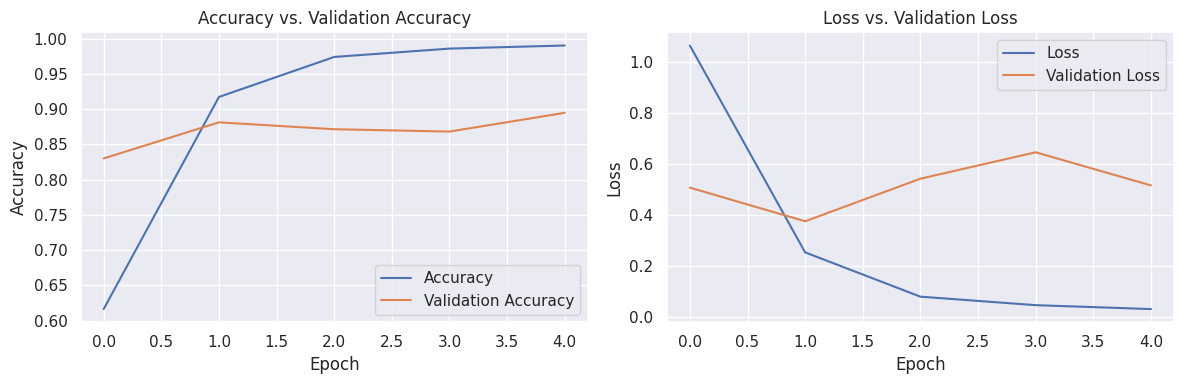

In [ ]:
accuracy = history_gru.history['accuracy']
val_accuracy = history_gru.history['val_accuracy']
loss = history_gru.history['loss']
val_loss = history_gru.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Validation Loss')

plt.tight_layout()
plt.show()

In [ ]:
hist_=pd.DataFrame(history_gru.history)
hist_

,loss,accuracy,val_loss,val_accuracy,lr
0,1.064556,0.616564,0.506439,0.830159,0.001
1,0.252120,0.917289,0.374284,0.881311,0.001
2,0.078217,0.974035,0.541502,0.871568,0.001
3,0.044830,0.985883,0.645210,0.868246,0.001
4,0.029482,0.990256,0.515143,0.894818,0.001


In [ ]:
loss, accuracy = model_gru.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

142/142 [==============================] - 19s 135ms/step - loss: 0.5151 - accuracy: 0.8948
Test Loss: 0.5151
Test Accuracy: 89.48%


In [ ]:
class_names = label_encoder.classes_

y_test_original = np.argmax(y_test, axis=1)
y_pred = np.argmax(model_gru.predict(X_test), axis=1)

report = classification_report(y_test_original, y_pred, target_names=class_names)
print('Classification Report:\n', report)

142/142 [==============================] - 18s 121ms/step
Classification Report:
               precision    recall  f1-score   support

      action       0.92      0.87      0.89       473
   adventure       0.91      0.80      0.85        25
      comedy       0.93      0.88      0.91       635
       drama       0.90      0.94      0.92      1728
      horror       0.42      0.76      0.54        84
       other       0.96      0.83      0.89        66
     romance       0.75      0.25      0.38        12
      sci-fi       0.83      0.61      0.71       106
    thriller       0.92      0.89      0.90      1387

    accuracy                           0.89      4516
   macro avg       0.84      0.76      0.78      4516
weighted avg       0.90      0.89      0.90      4516



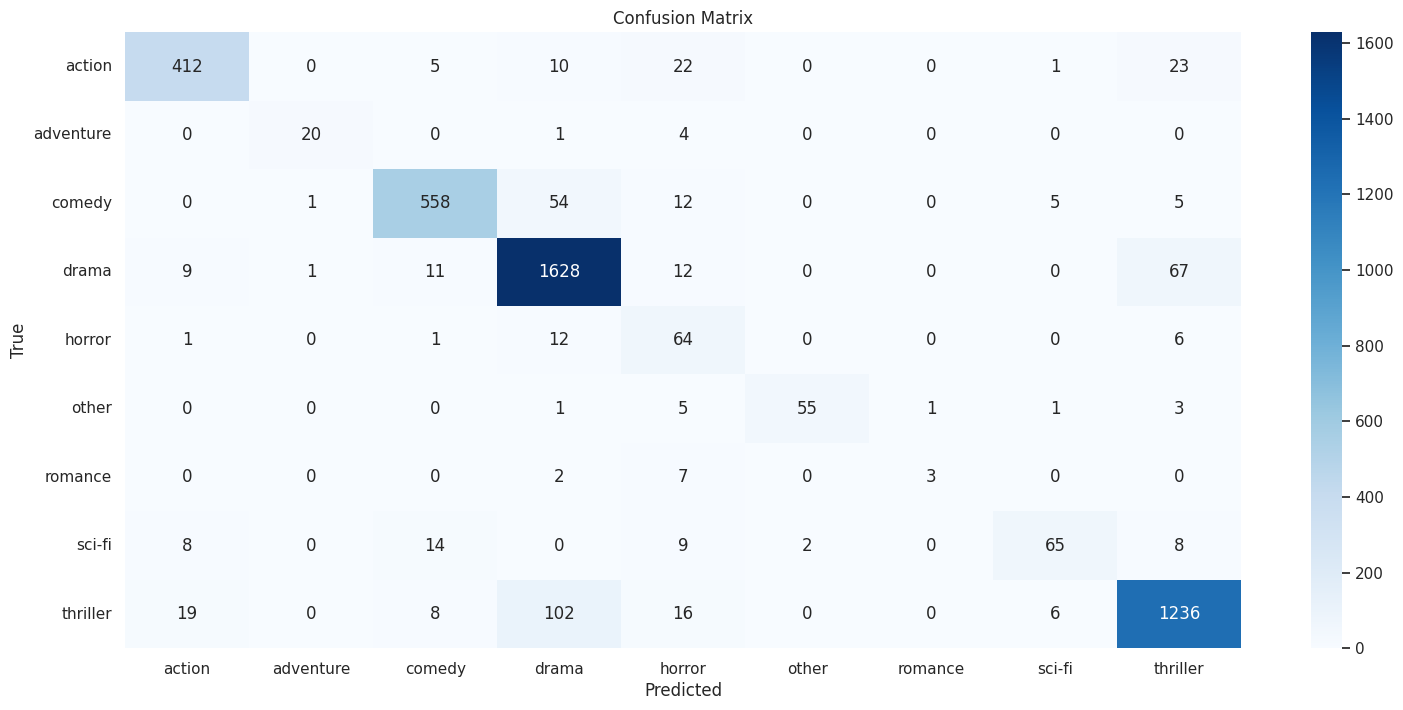

In [ ]:
conf_matrix = confusion_matrix(y_test_original, y_pred)

plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def predict_genres(scripts, model, tokenizer, max_length, label_encoder):
    predictions = []

    for script in scripts:
        sequences = tokenizer.texts_to_sequences([script])
        padded_sequences = pad_sequences(sequences, maxlen=max_length)

        probabilities = model.predict(padded_sequences)[0]
        predicted_genre = label_encoder.inverse_transform([probabilities.argmax()])[0]
        predictions.append((predicted_genre, probabilities.max()))

    return predictions

scripts = [
    "dead bodies. GEORDI Mitchell... DePaul... LANGE This one's a woman... named Kirby. Picard and Beverly move toward the immense blast door. As Beverly scans it, Picard glances at a nearby desk... 57 THE DESK 57 is littered with debris and various documents and schematics. THREE PHOTOGRAPHS are pinned to a bulletin board above the desk they show Zephram Cochrane and two angles of his warp ship. The photos are odd looking, printed on what appears to be some sort of cloth. BEVERLY There's a life sign behind this door... about ten meters below. Geordi moves to the door. GEORDI Blast door. It's designed to protect the control room when the missile is launched. PICARD There should be some kind of manual release... They hunt around for a moment. Geordi runs his hand along the edge of the blast door. Picard turns to the Guards. PICARD to Lange Get those fires out and then try to restore main power to the control room. LANGE Aye, sir. The Guards move off. GEORDI Got it, Captain. Geordi has found",
    "slowly. At the entrance to the alley stands a vampire. They stare at each other, some thirty feet away. BUFFY continuing Hello... She moves back a step. The vampire takes a step. BUFFY continuing What do you want? It floats rapidly at her, hissing. Buffy looks about her frantically, trapped. It hits her at top speed and she instantly rolls onto her back, flipping it and hurling it against the wall at the end of the alley. As it hits, Buffy, still rolling, produces a stake from her jacket and throws it directly at its heart. The stake punctures the startled creature's chest. Before he can so much as grab it, Buffy throws a roundhouse kick, driving the stake all the way home with her foot. The vampire screams, sinks to the ground. Buffy turns, triumphant. BUFFY continuing Toaster caked him! CLOSEUP A STOPWATCH A hand stops it. It is Merrick, who steps into the alley and stares at Buffy. CUT TO EXT. OUTSIDE THE WAREHOUSE NIGHT The two exit Merrick's car, an old Dodge Dart. As they talk, t",
    "edge of the field. Neil steps closer. THE TOMBSTONE The inscription reads Here Lies Amanda Krueger Her name in Christ, Sister Mary Helena. Born 1907 Died 1968 CLOSEUP NEIL NEIL softly My God. You were his mother. DISSOLVE TO EXT. NEIL'S HOUSE NIGHT The seasons have changed. A blanket of freshly fallen snow covers the house. A VW Rabbit with New York plates is parked in the driveway. INT. NEIL'S HOUSE Kristen and Neil have finished a meal together and are sipping wine. Her hair is shorter. Neil looks thinner, a little weary. NEIL I'm glad things have worked out for you. KRISTEN I think new York was just what I needed. So many people. I never feel alone. NEIL smiles The city that never sleeps. pause So what will you do now? KRISTEN I don't know. I'm busy with school. New friends. beat But I'll never forget the old ones. NEIL raises his glass To old friends. And your new dreams. KRISTEN To old friends. CUT TO EXT. NEIL'S HOUSE NIGHT Neil is at the door, seeing Kristen off. NEIL It was gre",
    "glances at her. BOOK Maybe I ought to learn to drive this thing. Rachel says nothing. BOOK beat Pick myself up another useful skill. Now Rachel can't help but smile. She looks at him. And... EXT. ANGLE We can see the Lapp buggy approaching a rural intersection, another buggy approaching at right angles. INT. LAPP BUGGY As Rachel eyes the other buggy through the windshield. RACHEL Samuel, who is that? Samuel checks out the buggy. SAMUEL It looks like Hochstetler's mare. EXT. ANGLE As the Lapp buggy passes the intersection and the Hochstetler buggy swings in behind them. Then the Hochstetler buggy, coming on at a faster clip, starts to pass the Lapp buggy. INT. LAPP BUGGY As Rachel waves at the occupants of the other buggy Daniel returns her greeting BOOK teasing her Uh oh, they're leaving us behind. Rachel gives him a look, and... gives the reins a flick the race is on. RACE MONTAGE Hochstetler has a couple of older folk on board, together with his young sister at first they're not awa"
]

predicted_genres = predict_genres( scripts, model_gru, tokenizer, max_length, label_encoder)

for text, (predicted_genre, probability) in zip(scripts, predicted_genres):
    print(f"Script Portion: '{text}'")
    print(f"Predicted Genre: {predicted_genre}")
    print(f"Probability of {predicted_genre}: {probability:.4f}\n")


1/1 [==============================] - 0s 198ms/step
Script Portion: 'dead bodies. GEORDI Mitchell... DePaul... LANGE This one's a woman... named Kirby. Picard and Beverly move toward the immense blast door. As Beverly scans it, Picard glances at a nearby desk... 57 THE DESK 57 is littered with debris and various documents and schematics. THREE PHOTOGRAPHS are pinned to a bulletin board above the desk they show Zephram Cochrane and two angles of his warp ship. The photos are odd looking, printed on what appears to be some sort of cloth. BEVERLY There's a life sign behind this door... about ten meters below. Geordi moves to the door. GEORDI Blast door. It's designed to protect the control room when the missile is launched. PICARD There should be some kind of manual release... They hunt around for a moment. Geordi runs his hand along the edge of the blast door. Picard turns to the Guards. PICARD to Lange Get those fires out and then try to restore main power to the control room. LANGE Ay

##Training and Evaluating CNN Model for Movie Genre Prediction

In [ ]:
model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
model_cnn.add(Conv1D(64, 2, activation='relu'))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Conv1D(128, 2, activation='relu'))
model_cnn.add(MaxPooling1D(2))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.3))
model_cnn.add(Dense(len(label_encoder.classes_), activation='softmax'))

model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 220, 128)          9285248   
                                                                 
 conv1d_16 (Conv1D)          (None, 219, 64)           16448     
                                                                 
 max_pooling1d_16 (MaxPooli  (None, 109, 64)           0         
 ng1D)                                                           
                                                                 
 conv1d_17 (Conv1D)          (None, 108, 128)          16512     
                                                                 
 max_pooling1d_17 (MaxPooli  (None, 54, 128)           0         
 ng1D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 6912)             

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath="cnn-best_model.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)
early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks3=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history_cnn= model_cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64, callbacks=callbacks3)

Epoch 1/5
283/283 [==============================] - 97s 336ms/step - loss: 1.0937 - accuracy: 0.5867 - val_loss: 0.4921 - val_accuracy: 0.8410 - lr: 0.0010
Epoch 2/5
283/283 [==============================] - 87s 306ms/step - loss: 0.3095 - accuracy: 0.8955 - val_loss: 0.3951 - val_accuracy: 0.8663 - lr: 0.0010
Epoch 3/5
283/283 [==============================] - 87s 306ms/step - loss: 0.1354 - accuracy: 0.9542 - val_loss: 0.4416 - val_accuracy: 0.8851 - lr: 0.0010
Epoch 4/5
283/283 [==============================] - 100s 352ms/step - loss: 0.0755 - accuracy: 0.9744 - val_loss: 0.5236 - val_accuracy: 0.8820 - lr: 0.0010
Epoch 5/5
283/283 [==============================] - 87s 308ms/step - loss: 0.0429 - accuracy: 0.9870 - val_loss: 0.5254 - val_accuracy: 0.8917 - lr: 0.0010


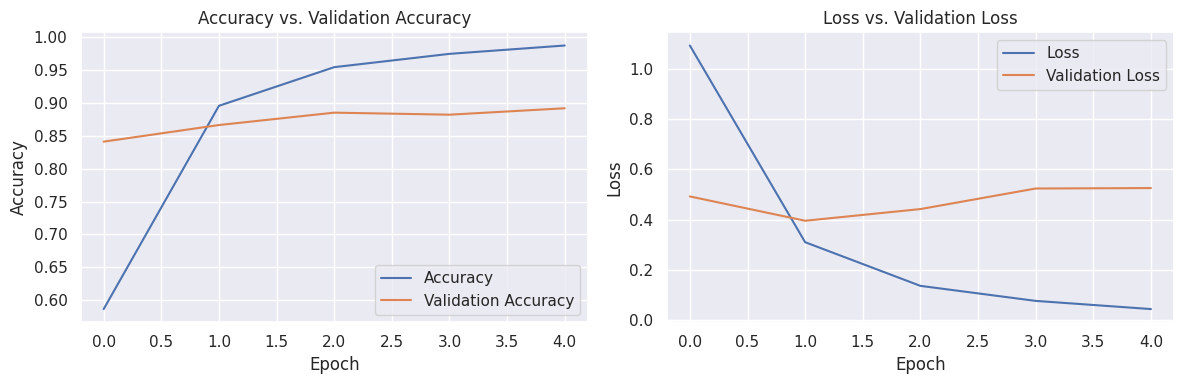

In [ ]:
accuracy = history_cnn.history['accuracy']
val_accuracy = history_cnn.history['val_accuracy']
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Validation Loss')

plt.tight_layout()
plt.show()

In [ ]:
hist_=pd.DataFrame(history_cnn.history)
hist_

,loss,accuracy,val_loss,val_accuracy,lr
0,1.093739,0.586724,0.492074,0.841010,0.001
1,0.309536,0.895477,0.395095,0.866253,0.001
2,0.135434,0.954160,0.441595,0.885075,0.001
3,0.075522,0.974367,0.523627,0.881975,0.001
4,0.042911,0.987045,0.525350,0.891718,0.001


In [ ]:
loss, accuracy = model_cnn.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

142/142 [==============================] - 4s 26ms/step - loss: 0.5254 - accuracy: 0.8917
Test Loss: 0.5254
Test Accuracy: 89.17%


In [ ]:
class_names = label_encoder.classes_

y_test_original = np.argmax(y_test, axis=1)
y_pred = np.argmax(model_cnn.predict(X_test), axis=1)

report = classification_report(y_test_original, y_pred, target_names=class_names)
print('Classification Report:\n', report)

142/142 [==============================] - 3s 20ms/step
Classification Report:
               precision    recall  f1-score   support

      action       0.94      0.92      0.93       473
   adventure       0.79      0.44      0.56        25
      comedy       0.89      0.91      0.90       635
       drama       0.93      0.90      0.91      1728
      horror       0.37      0.69      0.48        84
       other       0.97      0.55      0.70        66
     romance       0.00      0.00      0.00        12
      sci-fi       0.68      0.75      0.71       106
    thriller       0.91      0.92      0.91      1387

    accuracy                           0.89      4516
   macro avg       0.72      0.68      0.68      4516
weighted avg       0.90      0.89      0.89      4516



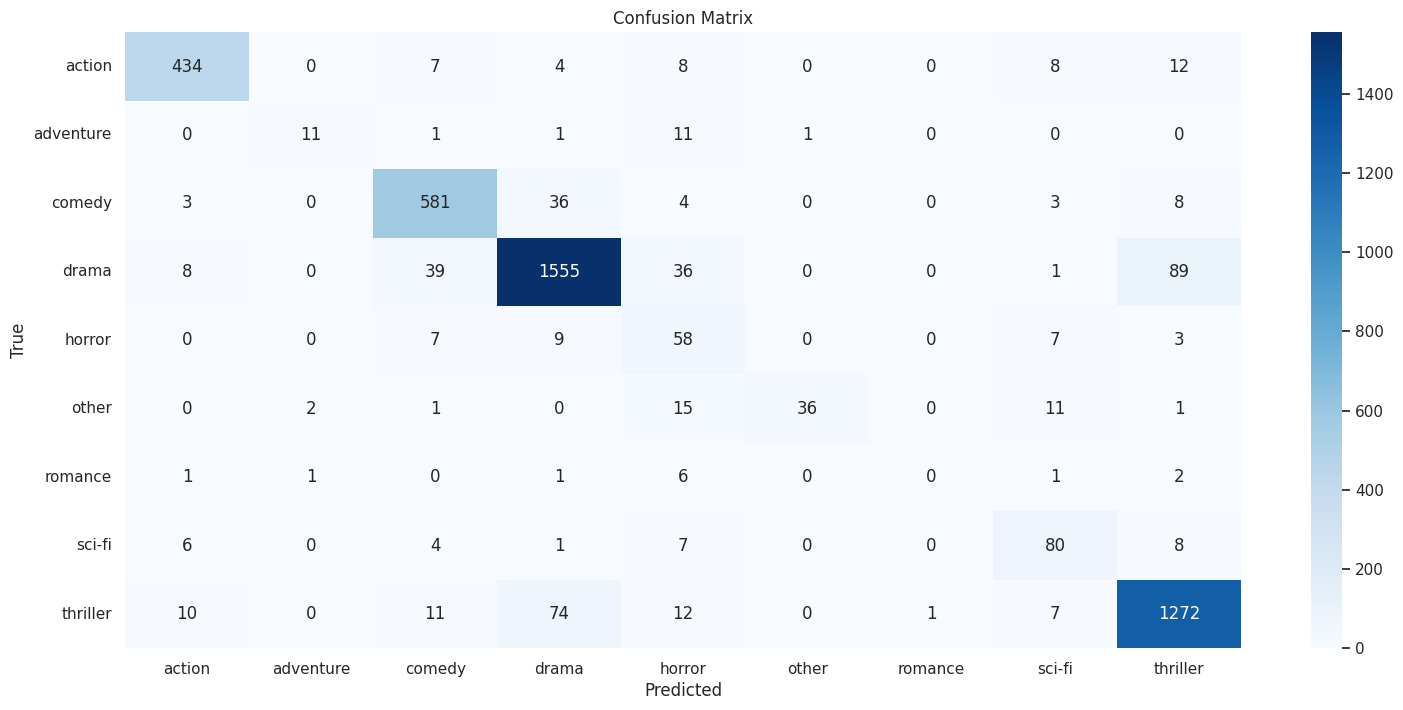

In [ ]:
conf_matrix = confusion_matrix(y_test_original, y_pred)

plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def predict_genres(scripts, model, tokenizer, max_length, label_encoder):
    predictions = []

    for script in scripts:
        sequences = tokenizer.texts_to_sequences([script])
        padded_sequences = pad_sequences(sequences, maxlen=max_length)

        probabilities = model.predict(padded_sequences)[0]
        predicted_genre = label_encoder.inverse_transform([probabilities.argmax()])[0]
        predictions.append((predicted_genre, probabilities.max()))

    return predictions

scripts = [
    "dead bodies. GEORDI Mitchell... DePaul... LANGE This one's a woman... named Kirby. Picard and Beverly move toward the immense blast door. As Beverly scans it, Picard glances at a nearby desk... 57 THE DESK 57 is littered with debris and various documents and schematics. THREE PHOTOGRAPHS are pinned to a bulletin board above the desk they show Zephram Cochrane and two angles of his warp ship. The photos are odd looking, printed on what appears to be some sort of cloth. BEVERLY There's a life sign behind this door... about ten meters below. Geordi moves to the door. GEORDI Blast door. It's designed to protect the control room when the missile is launched. PICARD There should be some kind of manual release... They hunt around for a moment. Geordi runs his hand along the edge of the blast door. Picard turns to the Guards. PICARD to Lange Get those fires out and then try to restore main power to the control room. LANGE Aye, sir. The Guards move off. GEORDI Got it, Captain. Geordi has found",
    "slowly. At the entrance to the alley stands a vampire. They stare at each other, some thirty feet away. BUFFY continuing Hello... She moves back a step. The vampire takes a step. BUFFY continuing What do you want? It floats rapidly at her, hissing. Buffy looks about her frantically, trapped. It hits her at top speed and she instantly rolls onto her back, flipping it and hurling it against the wall at the end of the alley. As it hits, Buffy, still rolling, produces a stake from her jacket and throws it directly at its heart. The stake punctures the startled creature's chest. Before he can so much as grab it, Buffy throws a roundhouse kick, driving the stake all the way home with her foot. The vampire screams, sinks to the ground. Buffy turns, triumphant. BUFFY continuing Toaster caked him! CLOSEUP A STOPWATCH A hand stops it. It is Merrick, who steps into the alley and stares at Buffy. CUT TO EXT. OUTSIDE THE WAREHOUSE NIGHT The two exit Merrick's car, an old Dodge Dart. As they talk, t",
    "edge of the field. Neil steps closer. THE TOMBSTONE The inscription reads Here Lies Amanda Krueger Her name in Christ, Sister Mary Helena. Born 1907 Died 1968 CLOSEUP NEIL NEIL softly My God. You were his mother. DISSOLVE TO EXT. NEIL'S HOUSE NIGHT The seasons have changed. A blanket of freshly fallen snow covers the house. A VW Rabbit with New York plates is parked in the driveway. INT. NEIL'S HOUSE Kristen and Neil have finished a meal together and are sipping wine. Her hair is shorter. Neil looks thinner, a little weary. NEIL I'm glad things have worked out for you. KRISTEN I think new York was just what I needed. So many people. I never feel alone. NEIL smiles The city that never sleeps. pause So what will you do now? KRISTEN I don't know. I'm busy with school. New friends. beat But I'll never forget the old ones. NEIL raises his glass To old friends. And your new dreams. KRISTEN To old friends. CUT TO EXT. NEIL'S HOUSE NIGHT Neil is at the door, seeing Kristen off. NEIL It was gre",
    "glances at her. BOOK Maybe I ought to learn to drive this thing. Rachel says nothing. BOOK beat Pick myself up another useful skill. Now Rachel can't help but smile. She looks at him. And... EXT. ANGLE We can see the Lapp buggy approaching a rural intersection, another buggy approaching at right angles. INT. LAPP BUGGY As Rachel eyes the other buggy through the windshield. RACHEL Samuel, who is that? Samuel checks out the buggy. SAMUEL It looks like Hochstetler's mare. EXT. ANGLE As the Lapp buggy passes the intersection and the Hochstetler buggy swings in behind them. Then the Hochstetler buggy, coming on at a faster clip, starts to pass the Lapp buggy. INT. LAPP BUGGY As Rachel waves at the occupants of the other buggy Daniel returns her greeting BOOK teasing her Uh oh, they're leaving us behind. Rachel gives him a look, and... gives the reins a flick the race is on. RACE MONTAGE Hochstetler has a couple of older folk on board, together with his young sister at first they're not awa"
]

predicted_genres = predict_genres( scripts, model_cnn, tokenizer, max_length, label_encoder)

for text, (predicted_genre, probability) in zip(scripts, predicted_genres):
    print(f"Script Portion: '{text}'")
    print(f"Predicted Genre: {predicted_genre}")
    print(f"Probability of {predicted_genre}: {probability:.4f}\n")

1/1 [==============================] - 0s 23ms/step
Script Portion: 'dead bodies. GEORDI Mitchell... DePaul... LANGE This one's a woman... named Kirby. Picard and Beverly move toward the immense blast door. As Beverly scans it, Picard glances at a nearby desk... 57 THE DESK 57 is littered with debris and various documents and schematics. THREE PHOTOGRAPHS are pinned to a bulletin board above the desk they show Zephram Cochrane and two angles of his warp ship. The photos are odd looking, printed on what appears to be some sort of cloth. BEVERLY There's a life sign behind this door... about ten meters below. Geordi moves to the door. GEORDI Blast door. It's designed to protect the control room when the missile is launched. PICARD There should be some kind of manual release... They hunt around for a moment. Geordi runs his hand along the edge of the blast door. Picard turns to the Guards. PICARD to Lange Get those fires out and then try to restore main power to the control room. LANGE Aye

##Training and Evaluating Hybrid Model for Movie Genre Prediction

In [ ]:
model_hb = Sequential()
model_hb.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
model_hb.add(Conv1D(128, 2, activation='relu'))
model_hb.add(MaxPooling1D(2))
model_hb.add(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model_hb.add(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model_hb.add(LSTM(32, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model_hb.add(Flatten())
model_hb.add(Dense(128, activation='relu'))
model_hb.add(Dropout(0.3))
model_hb.add(Dense(len(label_encoder.classes_), activation='softmax'))

model_hb.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_hb.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 220, 128)          9285248   
                                                                 
 conv1d_18 (Conv1D)          (None, 219, 128)          32896     
                                                                 
 max_pooling1d_18 (MaxPooli  (None, 109, 128)          0         
 ng1D)                                                           
                                                                 
 lstm_2 (LSTM)               (None, 109, 128)          131584    
                                                                 
 lstm_3 (LSTM)               (None, 109, 64)           49408     
                                                                 
 lstm_4 (LSTM)               (None, 109, 32)           12416     
                                                     

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath="CNN_LSTM_best_model.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)
early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks4=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history_hb= model_hb.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128, callbacks=callbacks4 )

Epoch 1/5
142/142 [==============================] - 368s 2s/step - loss: 1.2341 - accuracy: 0.5443 - val_loss: 0.6942 - val_accuracy: 0.7575 - lr: 0.0010
Epoch 2/5
142/142 [==============================] - 288s 2s/step - loss: 0.4105 - accuracy: 0.8587 - val_loss: 0.4800 - val_accuracy: 0.8452 - lr: 0.0010
Epoch 3/5
142/142 [==============================] - 297s 2s/step - loss: 0.1213 - accuracy: 0.9596 - val_loss: 0.5904 - val_accuracy: 0.8479 - lr: 0.0010
Epoch 4/5
142/142 [==============================] - 298s 2s/step - loss: 0.0615 - accuracy: 0.9797 - val_loss: 0.4906 - val_accuracy: 0.8773 - lr: 0.0010
Epoch 5/5
142/142 [==============================] - 304s 2s/step - loss: 0.0359 - accuracy: 0.9883 - val_loss: 0.5503 - val_accuracy: 0.8806 - lr: 0.0010


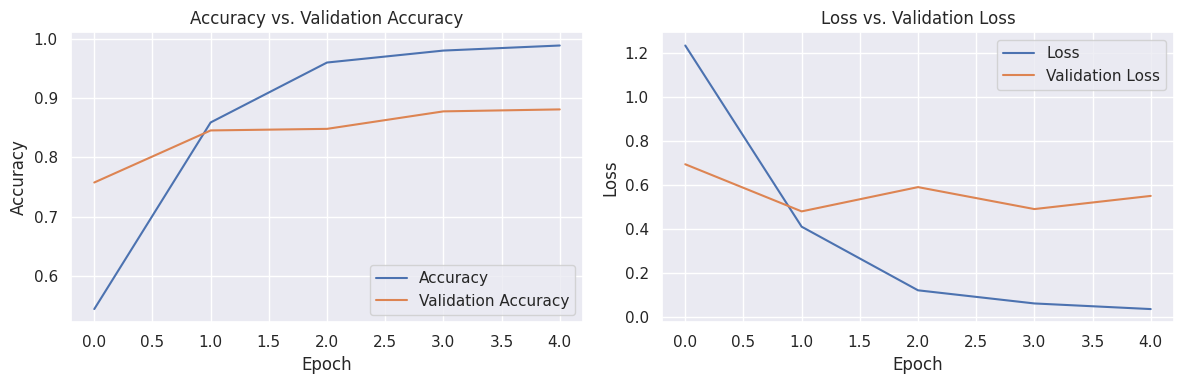

In [ ]:
accuracy = history_hb.history['accuracy']
val_accuracy = history_hb.history['val_accuracy']
loss = history_hb.history['loss']
val_loss = history_hb.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs. Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Validation Loss')

plt.tight_layout()
plt.show()

In [ ]:
hist_=pd.DataFrame(history_hb.history)
hist_

,loss,accuracy,val_loss,val_accuracy,lr
0,1.234089,0.544317,0.694216,0.757529,0.001
1,0.410465,0.858661,0.479988,0.845217,0.001
2,0.121251,0.959586,0.590387,0.847874,0.001
3,0.061518,0.979738,0.490570,0.877325,0.001
4,0.035948,0.988263,0.550349,0.880647,0.001


In [ ]:
loss, accuracy = model_hb.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

142/142 [==============================] - 15s 108ms/step - loss: 0.5503 - accuracy: 0.8806
Test Loss: 0.5503
Test Accuracy: 88.06%


In [ ]:
class_names = label_encoder.classes_

y_test_original = np.argmax(y_test, axis=1)
y_pred = np.argmax(model_hb.predict(X_test), axis=1)

report = classification_report(y_test_original, y_pred, target_names=class_names)
print('Classification Report:\n', report)

142/142 [==============================] - 16s 108ms/step
Classification Report:
               precision    recall  f1-score   support

      action       0.93      0.84      0.88       473
   adventure       0.85      0.88      0.86        25
      comedy       0.79      0.87      0.83       635
       drama       0.92      0.92      0.92      1728
      horror       0.45      0.67      0.54        84
       other       0.77      0.62      0.69        66
     romance       0.14      0.08      0.11        12
      sci-fi       0.73      0.74      0.73       106
    thriller       0.92      0.90      0.91      1387

    accuracy                           0.88      4516
   macro avg       0.72      0.72      0.72      4516
weighted avg       0.89      0.88      0.88      4516



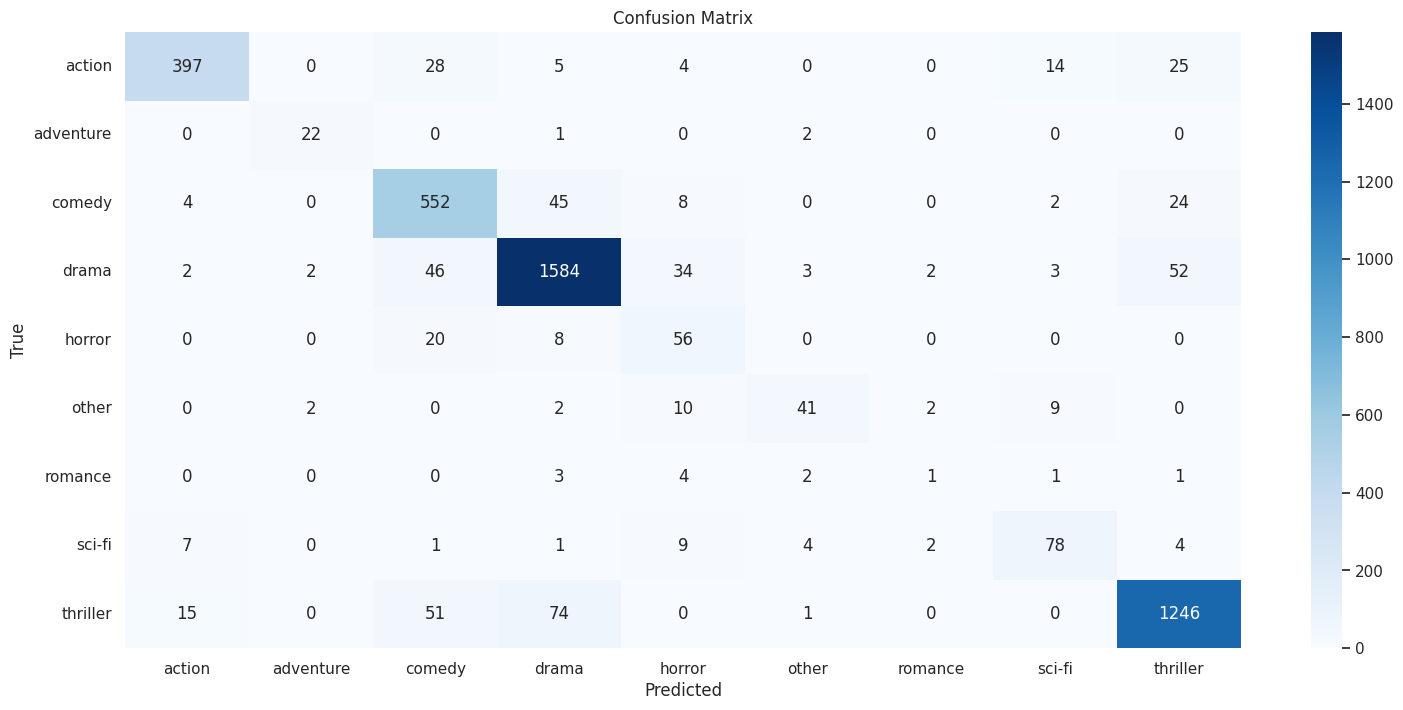

In [ ]:
conf_matrix = confusion_matrix(y_test_original, y_pred)

plt.figure(figsize=(18, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def predict_genres(scripts, model, tokenizer, max_length, label_encoder):
    predictions = []

    for script in scripts:
        sequences = tokenizer.texts_to_sequences([script])
        padded_sequences = pad_sequences(sequences, maxlen=max_length)

        probabilities = model.predict(padded_sequences)[0]
        predicted_genre = label_encoder.inverse_transform([probabilities.argmax()])[0]
        predictions.append((predicted_genre, probabilities.max()))

    return predictions

scripts = [
    "dead bodies. GEORDI Mitchell... DePaul... LANGE This one's a woman... named Kirby. Picard and Beverly move toward the immense blast door. As Beverly scans it, Picard glances at a nearby desk... 57 THE DESK 57 is littered with debris and various documents and schematics. THREE PHOTOGRAPHS are pinned to a bulletin board above the desk they show Zephram Cochrane and two angles of his warp ship. The photos are odd looking, printed on what appears to be some sort of cloth. BEVERLY There's a life sign behind this door... about ten meters below. Geordi moves to the door. GEORDI Blast door. It's designed to protect the control room when the missile is launched. PICARD There should be some kind of manual release... They hunt around for a moment. Geordi runs his hand along the edge of the blast door. Picard turns to the Guards. PICARD to Lange Get those fires out and then try to restore main power to the control room. LANGE Aye, sir. The Guards move off. GEORDI Got it, Captain. Geordi has found",
    "slowly. At the entrance to the alley stands a vampire. They stare at each other, some thirty feet away. BUFFY continuing Hello... She moves back a step. The vampire takes a step. BUFFY continuing What do you want? It floats rapidly at her, hissing. Buffy looks about her frantically, trapped. It hits her at top speed and she instantly rolls onto her back, flipping it and hurling it against the wall at the end of the alley. As it hits, Buffy, still rolling, produces a stake from her jacket and throws it directly at its heart. The stake punctures the startled creature's chest. Before he can so much as grab it, Buffy throws a roundhouse kick, driving the stake all the way home with her foot. The vampire screams, sinks to the ground. Buffy turns, triumphant. BUFFY continuing Toaster caked him! CLOSEUP A STOPWATCH A hand stops it. It is Merrick, who steps into the alley and stares at Buffy. CUT TO EXT. OUTSIDE THE WAREHOUSE NIGHT The two exit Merrick's car, an old Dodge Dart. As they talk, t",
    "edge of the field. Neil steps closer. THE TOMBSTONE The inscription reads Here Lies Amanda Krueger Her name in Christ, Sister Mary Helena. Born 1907 Died 1968 CLOSEUP NEIL NEIL softly My God. You were his mother. DISSOLVE TO EXT. NEIL'S HOUSE NIGHT The seasons have changed. A blanket of freshly fallen snow covers the house. A VW Rabbit with New York plates is parked in the driveway. INT. NEIL'S HOUSE Kristen and Neil have finished a meal together and are sipping wine. Her hair is shorter. Neil looks thinner, a little weary. NEIL I'm glad things have worked out for you. KRISTEN I think new York was just what I needed. So many people. I never feel alone. NEIL smiles The city that never sleeps. pause So what will you do now? KRISTEN I don't know. I'm busy with school. New friends. beat But I'll never forget the old ones. NEIL raises his glass To old friends. And your new dreams. KRISTEN To old friends. CUT TO EXT. NEIL'S HOUSE NIGHT Neil is at the door, seeing Kristen off. NEIL It was gre",
    "glances at her. BOOK Maybe I ought to learn to drive this thing. Rachel says nothing. BOOK beat Pick myself up another useful skill. Now Rachel can't help but smile. She looks at him. And... EXT. ANGLE We can see the Lapp buggy approaching a rural intersection, another buggy approaching at right angles. INT. LAPP BUGGY As Rachel eyes the other buggy through the windshield. RACHEL Samuel, who is that? Samuel checks out the buggy. SAMUEL It looks like Hochstetler's mare. EXT. ANGLE As the Lapp buggy passes the intersection and the Hochstetler buggy swings in behind them. Then the Hochstetler buggy, coming on at a faster clip, starts to pass the Lapp buggy. INT. LAPP BUGGY As Rachel waves at the occupants of the other buggy Daniel returns her greeting BOOK teasing her Uh oh, they're leaving us behind. Rachel gives him a look, and... gives the reins a flick the race is on. RACE MONTAGE Hochstetler has a couple of older folk on board, together with his young sister at first they're not awa"
]

predicted_genres = predict_genres( scripts, model_hb, tokenizer, max_length, label_encoder)

for text, (predicted_genre, probability) in zip(scripts, predicted_genres):
    print(f"Script Portion: '{text}'")
    print(f"Predicted Genre: {predicted_genre}")
    print(f"Probability of {predicted_genre}: {probability:.4f}\n")

1/1 [==============================] - 0s 58ms/step
Script Portion: 'dead bodies. GEORDI Mitchell... DePaul... LANGE This one's a woman... named Kirby. Picard and Beverly move toward the immense blast door. As Beverly scans it, Picard glances at a nearby desk... 57 THE DESK 57 is littered with debris and various documents and schematics. THREE PHOTOGRAPHS are pinned to a bulletin board above the desk they show Zephram Cochrane and two angles of his warp ship. The photos are odd looking, printed on what appears to be some sort of cloth. BEVERLY There's a life sign behind this door... about ten meters below. Geordi moves to the door. GEORDI Blast door. It's designed to protect the control room when the missile is launched. PICARD There should be some kind of manual release... They hunt around for a moment. Geordi runs his hand along the edge of the blast door. Picard turns to the Guards. PICARD to Lange Get those fires out and then try to restore main power to the control room. LANGE Aye

##Fine-Tuning BERT for Movie Genre Classification

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['genre'], test_size=0.25, random_state=42)

X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

class_names = ['action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller', 'other']

In [ ]:
(x_train,y_train), (x_val,y_val), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=200,
                                                                       max_features=10000)

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


/usr/local/lib/python3.10/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


task: text classification


In [ ]:
model = text.text_classifier('bert', train_data=(x_train,y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 200


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train,y_train),
                             val_data=(x_val,y_val),
                             batch_size=16)

In [ ]:
learner.fit_onecycle(2e-5, 3)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
1059/1059 [==============================] - 893s 822ms/step - loss: 1.2059 - accuracy: 0.5620 - val_loss: 0.5516 - val_accuracy: 0.8158
Epoch 2/3
1059/1059 [==============================] - 922s 871ms/step - loss: 0.3343 - accuracy: 0.8916 - val_loss: 0.2858 - val_accuracy: 0.9102
Epoch 3/3
1059/1059 [==============================] - 923s 872ms/step - loss: 0.0757 - accuracy: 0.9774 - val_loss: 0.2105 - val_accuracy: 0.9343


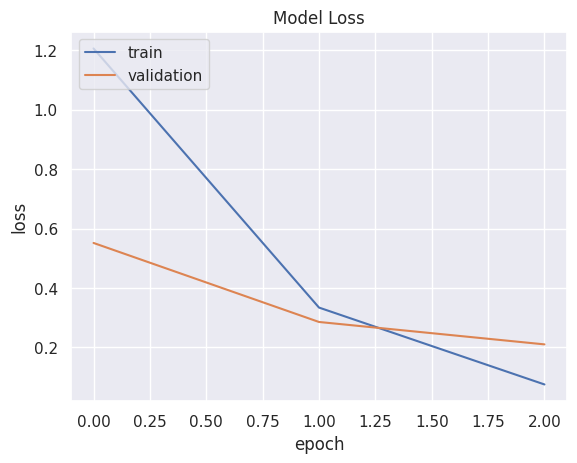

In [ ]:
learner.plot()

In [ ]:
learner.validate(val_data=(x_val,y_val), class_names=class_names)

177/177 [==============================] - 89s 474ms/step
              precision    recall  f1-score   support

      action       0.93      0.93      0.93       591
   adventure       0.94      0.97      0.95        32
      comedy       0.94      0.90      0.92       777
       drama       0.94      0.94      0.94      2188
      horror       0.83      0.88      0.85        97
     romance       0.96      0.87      0.91        77
      sci-fi       0.93      0.93      0.93        15
    thriller       0.91      0.89      0.90       147
       other       0.93      0.94      0.94      1721

    accuracy                           0.93      5645
   macro avg       0.92      0.92      0.92      5645
weighted avg       0.93      0.93      0.93      5645



array([[ 551,    0,    7,   17,    0,    1,    0,    1,   14],
       [   0,   31,    0,    1,    0,    0,    0,    0,    0],
       [   8,    0,  702,   37,    1,    0,    0,    2,   27],
       [  15,    2,   21, 2067,    9,    0,    1,    4,   69],
       [   0,    0,    0,    6,   85,    0,    0,    1,    5],
       [   3,    0,    3,    2,    1,   67,    0,    0,    1],
       [   0,    0,    0,    1,    0,    0,   14,    0,    0],
       [   3,    0,    0,    3,    1,    1,    0,  131,    8],
       [  14,    0,   13,   56,    6,    1,    0,    5, 1626]])

In [ ]:
##https://www.kaggle.com/competitions/moviegenres/data